In [5]:
from pathlib import Path
import matplotlib.pyplot as plt
from sdi_variation import cluster_matching as cm
import pandas as pd

In [2]:
path = "output/MISC2"
files = list(Path(path).glob("*.csv"))
files

[PosixPath('output/MISC2/MISC2_151675_MISC2spagcn_vs_MISC2_151675_analysis__clustering_kmeans_4_clusters_clusters.csv'),
 PosixPath('output/MISC2/MISC2_151675_analysis__clustering_kmeans_6_clusters_clusters_vs_MISC2_151675_analysis__clustering_kmeans_8_clusters_clusters.csv'),
 PosixPath('output/MISC2/MISC2_151675_analysis__clustering_kmeans_9_clusters_clusters_vs_MISC2_151675_analysis__clustering_kmeans_8_clusters_clusters.csv'),
 PosixPath('output/MISC2/MISC2_151675_analysis__clustering_kmeans_5_clusters_clusters_vs_MISC2_151675_analysis__clustering_kmeans_3_clusters_clusters.csv'),
 PosixPath('output/MISC2/MISC2_151675_analysis__clustering_kmeans_5_clusters_clusters_vs_MISC2_151675_analysis__clustering_kmeans_7_clusters_clusters.csv'),
 PosixPath('output/MISC2/MISC2_151675_analysis__clustering_graphclust_clusters_vs_MISC2_151675_analysis__clustering_kmeans_2_clusters_clusters.csv'),
 PosixPath('output/MISC2/MISC2_151675_analysis__clustering_kmeans_9_clusters_clusters_vs_MISC2_151675

In [9]:
def dice_stats_df(files):
    for file in files:
        scores = pd.read_csv(file)
        avg = scores['scores'].mean()
        std = scores['scores'].std()
        yield file.stem, avg, std

data = list(dice_stats_df(files))
stats_df = pd.DataFrame(
    data=data,
    columns=['filename','avg score','score std']
).set_index('filename')
stats_df.head()

,avg score,score std
filename,,
MISC2_151675_MISC2spagcn_vs_MISC2_151675_analysis__clustering_kmeans_4_clusters_clusters,0.550456,0.329477
MISC2_151675_analysis__clustering_kmeans_6_clusters_clusters_vs_MISC2_151675_analysis__clustering_kmeans_8_clusters_clusters,0.794772,0.348100
MISC2_151675_analysis__clustering_kmeans_9_clusters_clusters_vs_MISC2_151675_analysis__clustering_kmeans_8_clusters_clusters,0.707429,0.325521
MISC2_151675_analysis__clustering_kmeans_5_clusters_clusters_vs_MISC2_151675_analysis__clustering_kmeans_3_clusters_clusters,0.592771,0.365395
MISC2_151675_analysis__clustering_kmeans_5_clusters_clusters_vs_MISC2_151675_analysis__clustering_kmeans_7_clusters_clusters,0.574033,0.375151


/tmp/ipykernel_10021/728631330.py:8: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


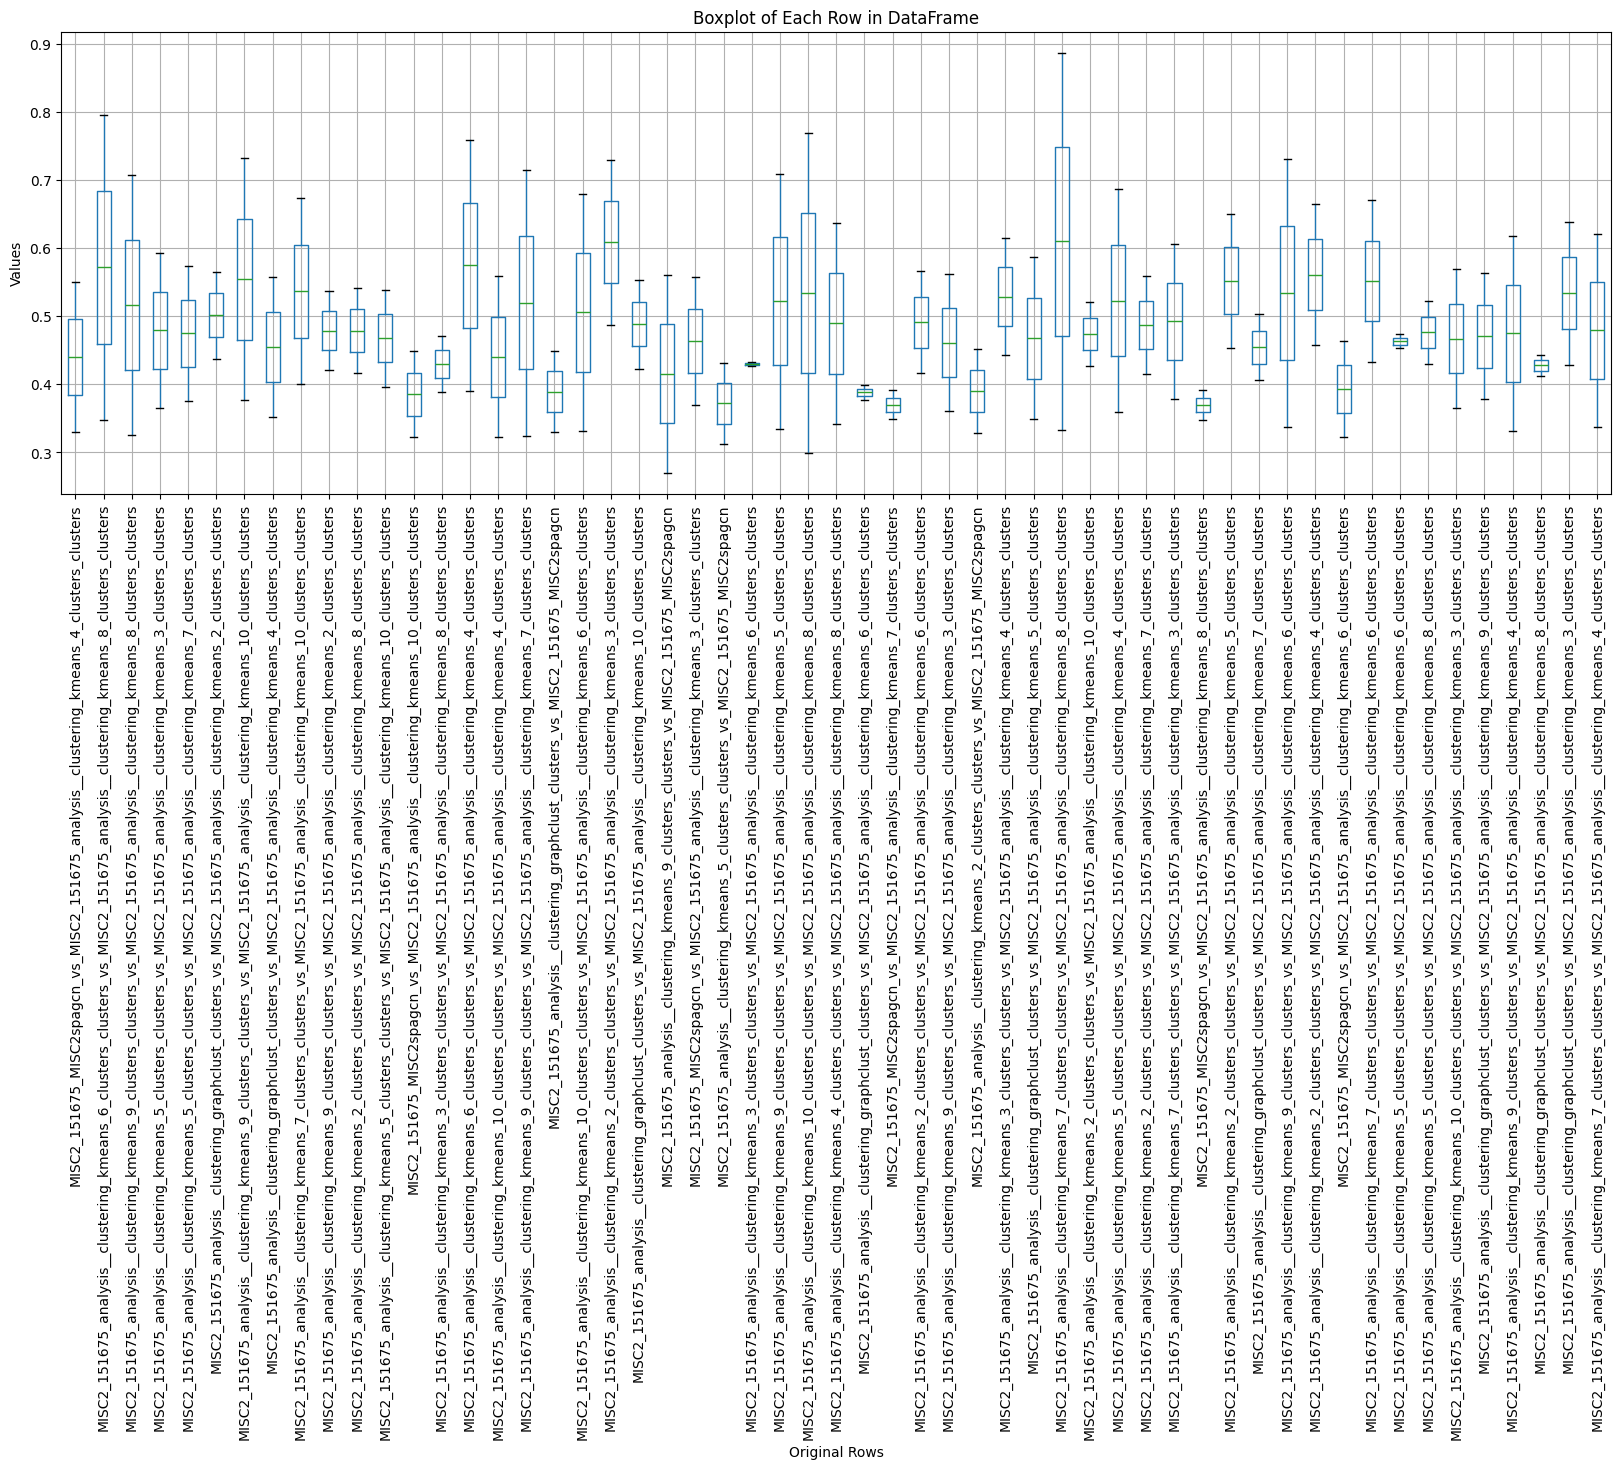

In [ ]:
plt.figure(figsize=(20, 6))  # Wider figure to fit labels

stats_df.transpose().boxplot()
plt.xticks(rotation=90)      # Rotate labels to avoid overlap
plt.title("Variation in Scores Per Methods")
plt.xlabel("Methods")
plt.ylabel("Score")
plt.tight_layout()
plt.show()